### Загрузим необходимые библиотеки и данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [ ]:
female_births = pd.read_csv('daily-total-female-births-in-cal.csv')
airline_passengers = pd.read_csv('international-airline-passengers.csv')
air_temperature = pd.read_csv('mean-monthly-air-temperature-deg.csv')
armed_robberies = pd.read_csv('monthly-boston-armed-robberies-j.csv')
sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
closings = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

### Посмотрим на структуру данных

In [ ]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
airline_passengers.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
air_temperature.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [ ]:
armed_robberies.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [ ]:
sales.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [ ]:
closings.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


### Визуализируем данные

In [ ]:
all_series = {
    "Daily total female births in California": female_births["Count"],
    "International airline passengers: monthly totals in thousands": airline_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": air_temperature["Deg"],
    "Monthly Boston armed robberies": armed_robberies["Count"],
    "Monthly sales of company X": sales["Count"],
    "Weekly closings of the Dow-Jones industrial average": closings["Close"],
}

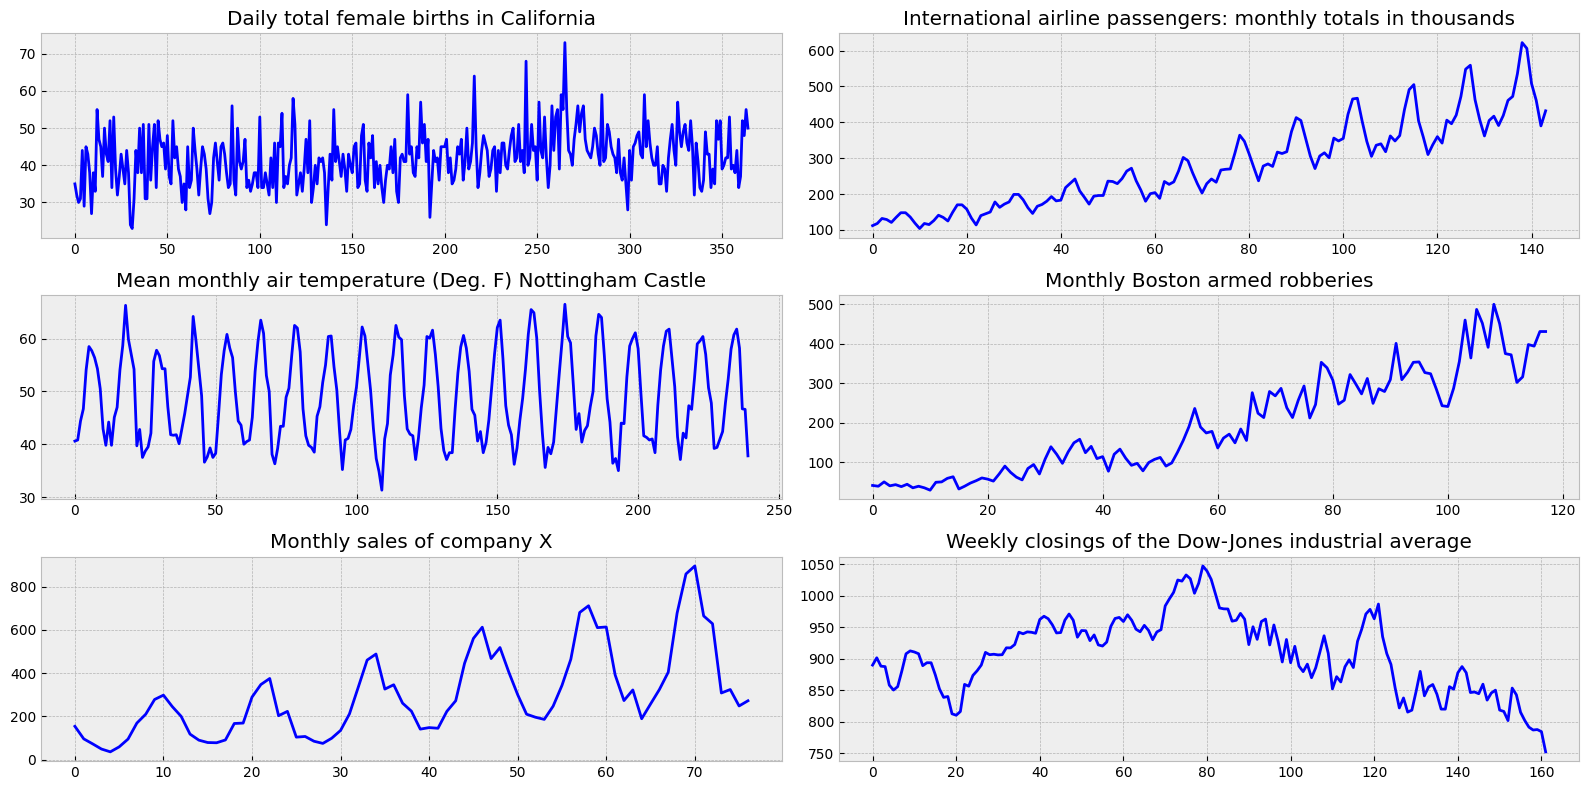

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

### Проверим временные ряды на сезонность и тренд

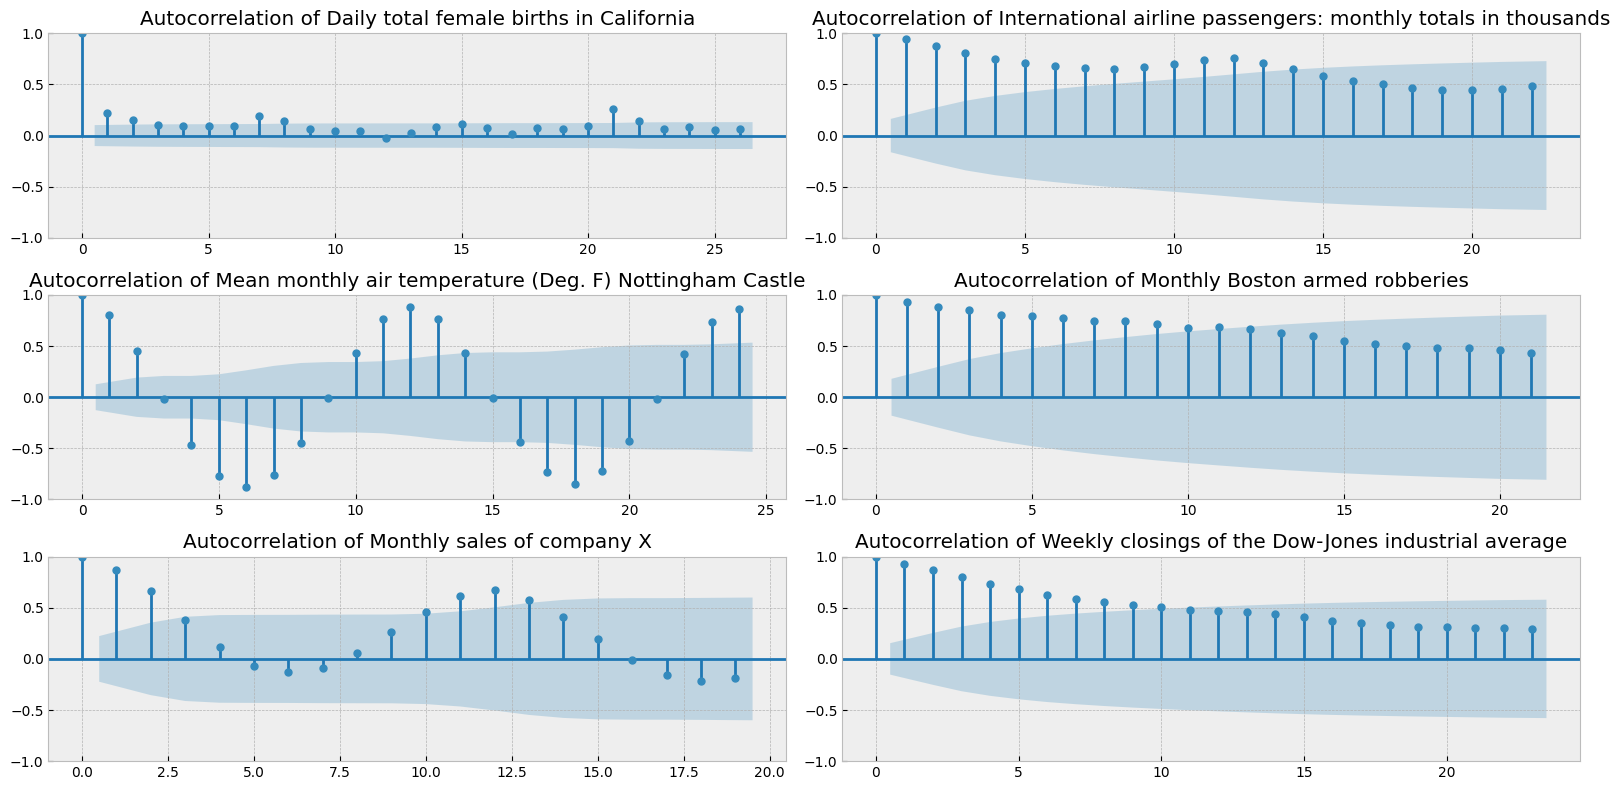

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        smt.graphics.plot_acf(all_series[key], ax=ts_ax, alpha=0.05)
        ts_ax.set_title(f'Autocorrelation of {key}')

    plt.tight_layout()

Анализ временных рядов:

1. Ежедневное общее количество девочек, рождённых в Калифорнии

Сезонность или тренд в данном ряду не наблюдаются

2. Количество международных пассажиров авиалиний

Наблюдается наличие восходящего тренда, а также сезонности, составляющей 12 месяцев

3. Среднемесячная температура воздуха в Ноттингемском замке

Наблюдается сезонность, составляющая 12 месяцев

4. Ежемесячные вооружённые ограбления в Бостоне

Наблюдается наличие восходящего тренда

5. Ежемесячный объём продаж компании X

Наблюдается наличие восходящего тренда, а также сезонности, составляющей 12 месяцев

6. Еженедельные закрытия промышленного индекса Доу-Джонса

В разные периоды времени наблюдается наличие восходящего или нисходящего тренда

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print(dftest[1])

In [ ]:
for key in all_series.keys():
  print(key)
  test_stationarity(all_series[key])
  print(f'\n')

Daily total female births in California
Results of Dickey-Fuller Test:
5.2434129901498554e-05


International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
0.991880243437641


Mean monthly air temperature (Deg. F) Nottingham Castle
Results of Dickey-Fuller Test:
0.016989030222608604


Monthly Boston armed robberies
Results of Dickey-Fuller Test:
0.994277563805723


Monthly sales of company X
Results of Dickey-Fuller Test:
0.9888894205170052


Weekly closings of the Dow-Jones industrial average
Results of Dickey-Fuller Test:
0.6224548515589733




Из всех временных рядов стационарным является только ряд ежедневного общего количества девочек, рождённых в Калифорнии

Попробуем преобразовать другие временные ряды, чтобы привести их к стационарности

### Преобразование временных рядов

In [ ]:
normalized_airline_passengers = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
normalized_air_temperature = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)
normalized_armed_robberies = boxcox(all_series["Monthly Boston armed robberies"], 0)
normalized_sales = boxcox(all_series["Monthly sales of company X"], 0)
normalized_closings = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

In [ ]:
diff_airline_passengers = np.diff(normalized_airline_passengers)
diff_air_temperature = np.diff(normalized_air_temperature)
diff_armed_robberies = np.diff(normalized_armed_robberies)
diff_sales = np.diff(normalized_sales)
diff_closings = np.diff(normalized_closings)

In [ ]:
diff_series = {
    "International airline passengers: monthly totals in thousands": diff_airline_passengers,
    "Mean monthly air temperature (Deg. F) Nottingham Castle": diff_air_temperature,
    "Monthly Boston armed robberies": diff_armed_robberies,
    "Monthly sales of company X": diff_sales,
    "Weekly closings of the Dow-Jones industrial average": diff_closings
}

In [ ]:
for key in diff_series.keys():
  print(key)
  test_stationarity(diff_series[key])
  print(f'\n')

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
0.07112054815086184


Mean monthly air temperature (Deg. F) Nottingham Castle
Results of Dickey-Fuller Test:
1.6407281304676633e-22


Monthly Boston armed robberies
Results of Dickey-Fuller Test:
2.3786024417437596e-11


Monthly sales of company X
Results of Dickey-Fuller Test:
0.024025392839875176


Weekly closings of the Dow-Jones industrial average
Results of Dickey-Fuller Test:
2.7516091322913448e-24




Из оставшихся временных рядов после преобразования все, кроме временного ряда количества международных пассажиров авиалиний, стали стационарными

Попробуем взять вторые разности от временного ряда количества международных пассажиров авиалиний

In [ ]:
two_diff_airline_passengers = np.diff(diff_airline_passengers)

In [ ]:
test_stationarity(two_diff_airline_passengers)

Results of Dickey-Fuller Test:
5.246133295174908e-17


Все временные ряды преоброзованы в стационарные